In [ ]:
# Base de Dados Zoo
# Identificar tipo de animal
# link: https://archive.ics.uci.edu/ml/datasets/Zoo

In [ ]:
# Proposta:
# Definir quais são os modelos com melhor precisão utilizando validação cruzadada

In [3]:
# =====   Importação das Bibliotecas   ===== #
from pandas import read_csv, DataFrame, Series
from numpy import zeros, array
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Criação e Teste dos classificadores escolhidos
def create_test_model(classificador, index_train, index_test):
    if classificador == 'naive bayes':
        modelo = GaussianNB()
    
    elif classificador == 'arvore':
        modelo = DecisionTreeClassifier()
    
    elif classificador == 'forest':
        modelo = RandomForestClassifier(n_estimators=12, criterion='entropy', random_state=0)
    
    elif classificador == 'knn':
        modelo = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    
    elif classificador == 'regressao':
        modelo = LogisticRegression(solver='liblinear')
    
    elif classificador == 'svm':
        modelo = SVC(kernel='rbf', random_state=1, C=2.0, gamma='auto')
    
    elif classificador == 'rna':
        modelo = MLPClassifier(max_iter=1000, tol=0.000001, solver='adam',
                           hidden_layer_sizes=(100), activation='relu',
                           batch_size=200, learning_rate_init=0.001)
    else:
        raise NameError ('Modelo escolhido nao esta na base de dados')
    
    modelo.fit(previsores[index_train], classe[index_train])
    previsoes = modelo.predict(previsores[index_test])

    return previsoes

In [5]:
# Avaliação da precisão dos classificadores
def avalia_modelos(previsores, classe, classificador, n_seed, n_folds=10):
    print('\nClassificador: {}'.format(classificador.title()))
    
    resultado = []
    for seed in range(n_seed):
        kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
        
        precisao = []
        for i_train, i_test in kfold.split(previsores, zeros(shape=(classe.shape[0], 1))):
            # Criacao e Teste do modelo
            previsoes = create_test_model(classificador, i_train, i_test)
            
            # Avaliacao do modelo
            score = accuracy_score(classe[i_test], previsoes)
            precisao.append(score)
        
        precisao = array(precisao)
        resultado.append(precisao.mean())
        print("seed {}: {}".format(seed, precisao.mean()))
    
    return resultado

In [6]:
# Armazena em disco (arquivo csv) os resultados obtivos a medida que realiza a avaliação
def create_file(resultado, modelo):
    global result_dataframe
    
    vetor = []
    for i in range(len(resultado)):
        vetor.append([i, resultado[i]])
    vetor = DataFrame(vetor, columns=['seed', modelo])
    
    result_dataframe = result_dataframe.merge(vetor, on='seed')
    
    colunas = list(result_dataframe.columns)
    arquivo = DataFrame(result_dataframe, columns=colunas)
    arquivo.to_csv(nome_arquivo, index=False)

def executa_avaliacao(seeds, use_models):
    global model_result, model_name
    
    for modelo in use_models:
        model_name.append(all_models[modelo].title())
        result = avalia_modelos(previsores, classe, classificador=all_models[modelo], n_seed=seeds)
        model_result.append(result)
        average_result[all_models[modelo].title()] = Series(array(result).mean())
        
        create_file(result, modelo=all_models[modelo].title())
    
    average_result.sort_values(by=0, axis=1, ascending=False, inplace=True)

In [7]:
# Visualização em grafico a média dos resultados de cada modelo
def view_accuracy():
    x = average_result.columns
    y = average_result.values.tolist()[0]
    plt.figure(figsize=(8,5))
    plt.plot(x, y, 'o-')
    plt.title('Precisão')
    plt.xlabel('Modelos')
    plt.ylabel('Precisão')

In [8]:
# Importação da base de dados Zoo
base = read_csv("zoo.csv")
atributos = list(base.columns)
del(atributos[0])

previsores = base.iloc[:, 1:17].values
classe = base.iloc[:, 17].values

In [9]:
# =====   Seleção dos modelos a utilizar   ===== #
# Selecionar os modelos alterando a variavel use_models
all_models = {1: 'naive bayes', 2: 'arvore', 3: 'forest',
              4: 'knn', 5: 'regressao', 6: 'svm', 7: 'rna'}
use_models = [1, 2, 3, 4, 5, 6, 7]

# nome do arquivo a serem salvos os resultados
nome_arquivo = 'resultados_zoo.csv'

In [10]:
# Criacao do dataframe que armazenara os resultados
seeds = 30
result_dataframe = DataFrame(list(range(seeds)), columns=['seed'])
average_result = DataFrame()

In [11]:
# =====   Coleta dos resultados e Criação do arquivo csv   ===== #
model_result = []
model_name = []

# Coletar os resultados associando-os aos respectivos modelos e Armazena-los em disco em formato csv
executa_avaliacao(seeds, use_models)

# para teste utilizando 1 unico modelo:
#executa_avaliacao(seeds, [3])


Classificador: Naive Bayes
seed 0: 0.95
seed 1: 0.9509090909090909
seed 2: 0.95
seed 3: 0.95
seed 4: 0.9600000000000002
seed 5: 0.9309090909090909
seed 6: 0.95
seed 7: 0.95
seed 8: 0.96
seed 9: 0.96
seed 10: 0.940909090909091
seed 11: 0.9609090909090909
seed 12: 0.9509090909090909
seed 13: 0.96
seed 14: 0.96
seed 15: 0.9509090909090909
seed 16: 0.95
seed 17: 0.9509090909090909
seed 18: 0.9400000000000001
seed 19: 0.95
seed 20: 0.95
seed 21: 0.95
seed 22: 0.95
seed 23: 0.9409090909090908
seed 24: 0.9509090909090908
seed 25: 0.96
seed 26: 0.95
seed 27: 0.95
seed 28: 0.9709090909090909
seed 29: 0.9436363636363636

Classificador: Arvore
seed 0: 0.9400000000000001
seed 1: 0.9509090909090909
seed 2: 0.95
seed 3: 0.9609090909090909
seed 4: 0.96
seed 5: 0.95
seed 6: 0.9400000000000001
seed 7: 0.95
seed 8: 0.9400000000000001
seed 9: 0.9509090909090909
seed 10: 0.9309090909090909
seed 11: 0.9618181818181819
seed 12: 0.9609090909090909
seed 13: 0.96
seed 14: 0.96
seed 15: 0.9609090909090909
seed

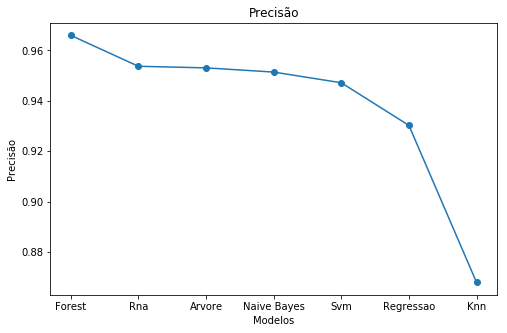

In [12]:
# Visualização Grafica das Precisoes
view_accuracy()

In [13]:
average_result

,Forest,Rna,Arvore,Naive Bayes,Svm,Regressao,Knn
0,0.966,0.953727,0.953091,0.951424,0.947182,0.930242,0.867909


In [ ]:
# Classificadores ficaram com precisoes parecidas.
# RandomForest, RNA e NaiveBayes
# são candidados para serem utilizados na combinação de classificadores